Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [15]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds

In [16]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

 22192128/228813984 [=>............................] - ETA: 1: - ETA: 2:34:4 - ETA: 1:26:2 - ETA: 57:06  - ETA: 1:15:2 - ETA: 1:11:5 - ETA: 1:00:5 - ETA: 1:03:0 - ETA: 56:22  - ETA: 57:1 - ETA: 56:2 - ETA: 55:3 - ETA: 55:1 - ETA: 55:0 - ETA: 54:4 - ETA: 54:2 - ETA: 54:0 - ETA: 55:1 - ETA: 53:1 - ETA: 53:0 - ETA: 52:5 - ETA: 52:3 - ETA: 52:2 - ETA: 51:5 - ETA: 51:4 - ETA: 52:4 - ETA: 50:5 - ETA: 50:4 - ETA: 51:4 - ETA: 50:0 - ETA: 49:5 - ETA: 49:3 - ETA: 49:4 - ETA: 48:4 - ETA: 48:4 - ETA: 48:2 - ETA: 48:1 - ETA: 49:5 - ETA: 47:3 - ETA: 47:2 - ETA: 47:2 - ETA: 47:0 - ETA: 46:5 - ETA: 46:4 - ETA: 46:3 - ETA: 46:2 - ETA: 46:1 - ETA: 46:0 - ETA: 45:5 - ETA: 47:2 - ETA: 45:5 - ETA: 46:0 - ETA: 45:5 - ETA: 46:0 - ETA: 45:5 - ETA: 46:2 - ETA: 49:3 - ETA: 52:1 - ETA: 51:5 - ETA: 55:0 - ETA: 54:5 - ETA: 54:5 - ETA: 59:0 - ETA: 59:2 - ETA: 1:00:5 - ETA: 1:06:1 - ETA: 1:06:5 - ETA: 1:06:3 - ETA: 1:09:5 - ETA: 1:16:0 - ETA: 1:15:3 - ETA: 1:18:5 - ETA: 1:20:1 - ETA: 1:18:5 - ETA: 1:18:3 - ETA: 1:18

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
batch_size = 32
img_height = 180
img_width = 180      

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2202 files for training.


In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 1468 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [26]:
#from keras.utils.np_utils import to_categorical
#y_train = np_utils.to_categorical(train_ds)
#y_test = np_utils.to_categorical(y_test)

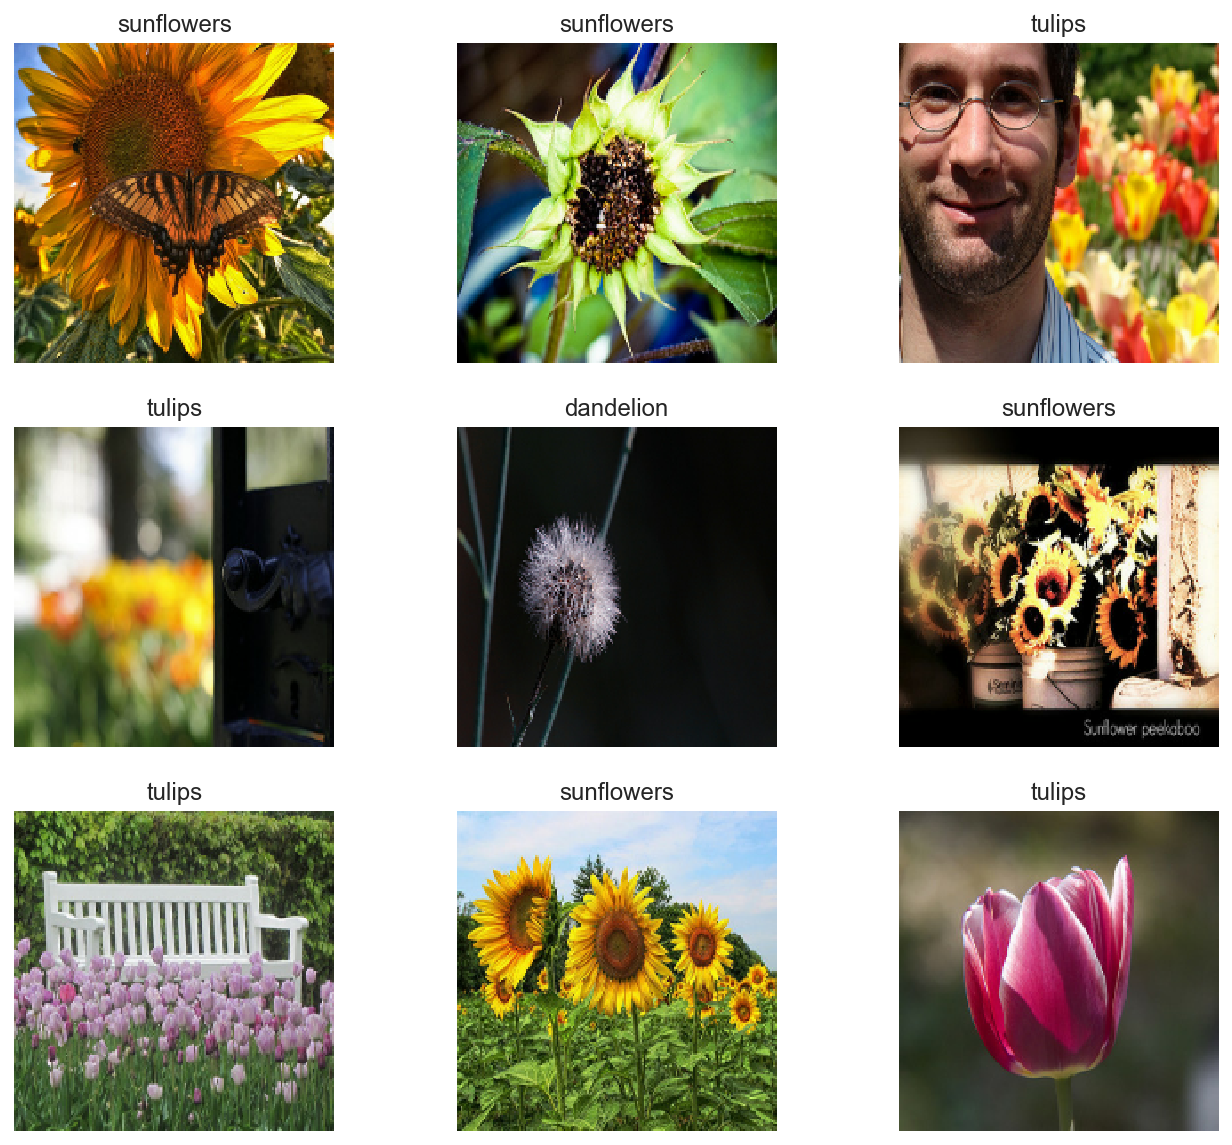

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [28]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [29]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


In [30]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [32]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
69/69 [==============================] - ETA: 0s - loss: 1.6242 - accuracy: 0.12 - ETA: 1:23 - loss: 1.8793 - accuracy: 0.17 - ETA: 1:46 - loss: 1.7562 - accuracy: 0.25 - ETA: 1:54 - loss: 1.6881 - accuracy: 0.26 - ETA: 1:59 - loss: 1.6942 - accuracy: 0.25 - ETA: 2:01 - loss: 1.6992 - accuracy: 0.24 - ETA: 2:04 - loss: 1.6778 - accuracy: 0.26 - ETA: 2:04 - loss: 1.6611 - accuracy: 0.26 - ETA: 2:03 - loss: 1.6476 - accuracy: 0.28 - ETA: 2:02 - loss: 1.6331 - accuracy: 0.27 - ETA: 2:01 - loss: 1.6188 - accuracy: 0.29 - ETA: 2:00 - loss: 1.5972 - accuracy: 0.30 - ETA: 1:59 - loss: 1.5875 - accuracy: 0.31 - ETA: 1:57 - loss: 1.5678 - accuracy: 0.32 - ETA: 1:55 - loss: 1.5510 - accuracy: 0.31 - ETA: 1:54 - loss: 1.5372 - accuracy: 0.32 - ETA: 1:52 - loss: 1.5385 - accuracy: 0.31 - ETA: 1:50 - loss: 1.5156 - accuracy: 0.32 - ETA: 1:48 - loss: 1.5038 - accuracy: 0.33 - ETA: 1:46 - loss: 1.4992 - accuracy: 0.33 - ETA: 1:44 - loss: 1.4878 - accuracy: 0.34 - ETA: 1:42 - loss: 1.4712 - 

In [33]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [34]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [35]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [37]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 180, 180, 3)
Label:  [1 3 2 2 4 1 1 1 4 1 0 4 0 2 2 4 0 1 3 4 1 1 1 2 4 3 4 1 0 0 4 1]


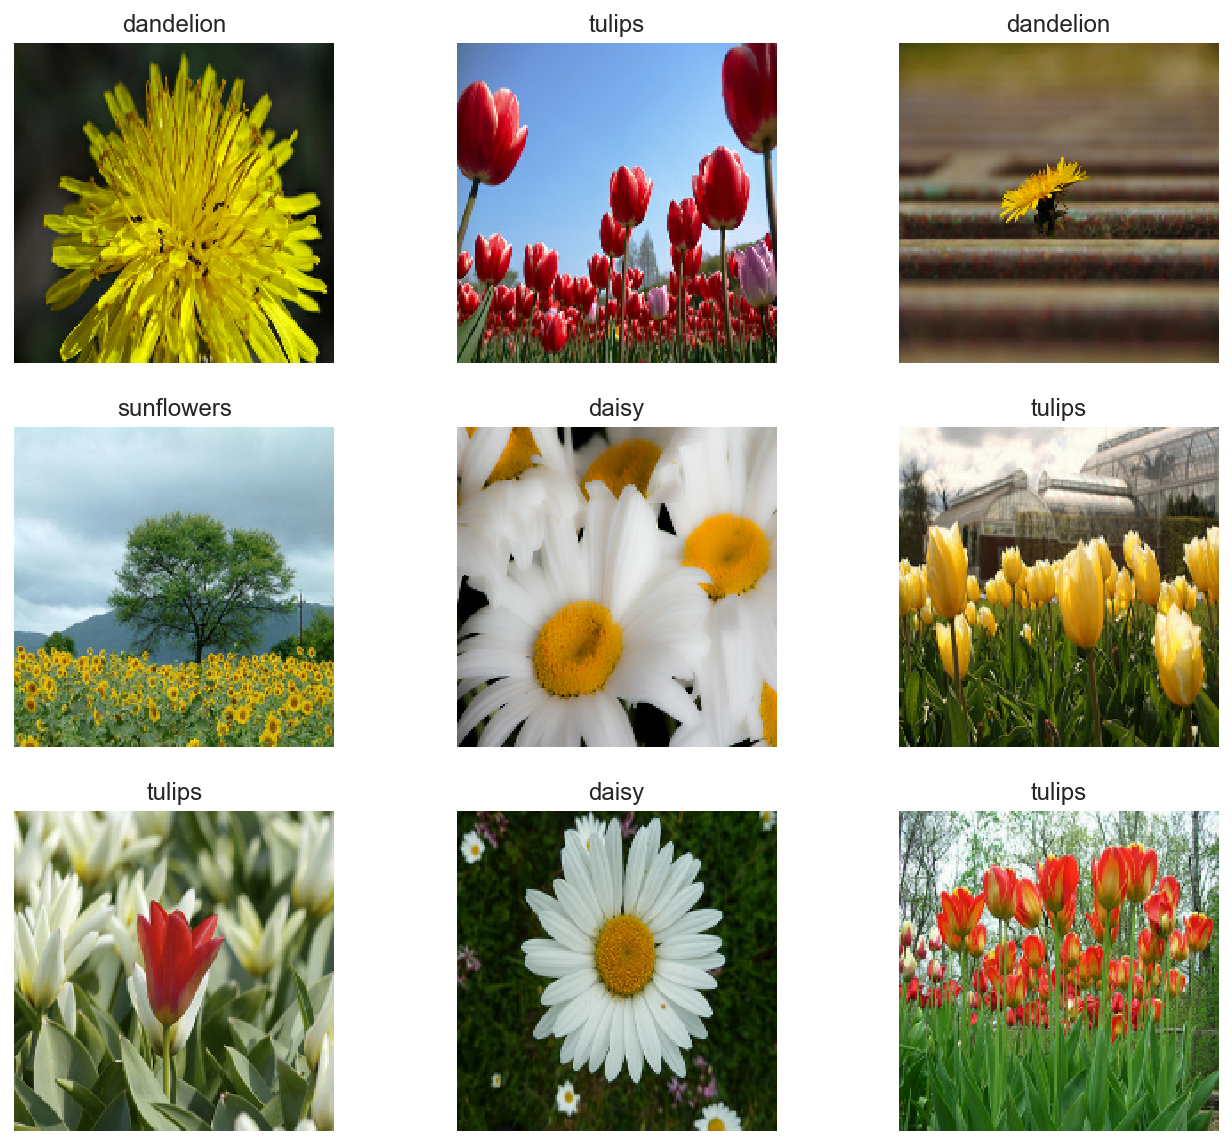

In [39]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
69/69 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.84 - ETA: 1:08 - loss: 0.4263 - accuracy: 0.81 - ETA: 1:27 - loss: 0.5251 - accuracy: 0.77 - ETA: 1:36 - loss: 0.5233 - accuracy: 0.77 - ETA: 1:39 - loss: 0.5170 - accuracy: 0.80 - ETA: 1:41 - loss: 0.5081 - accuracy: 0.81 - ETA: 1:43 - loss: 0.5108 - accuracy: 0.81 - ETA: 1:46 - loss: 0.5545 - accuracy: 0.78 - ETA: 1:47 - loss: 0.5324 - accuracy: 0.79 - ETA: 1:48 - loss: 0.5263 - accuracy: 0.80 - ETA: 1:47 - loss: 0.5299 - accuracy: 0.79 - ETA: 1:46 - loss: 0.5252 - accuracy: 0.79 - ETA: 1:45 - loss: 0.5132 - accuracy: 0.80 - ETA: 1:44 - loss: 0.5044 - accuracy: 0.80 - ETA: 1:43 - loss: 0.4944 - accuracy: 0.81 - ETA: 1:41 - loss: 0.4836 - accuracy: 0.81 - ETA: 1:40 - loss: 0.4741 - accuracy: 0.81 - ETA: 1:38 - loss: 0.4674 - accuracy: 0.82 - ETA: 1:36 - loss: 0.4638 - accuracy: 0.82 - ETA: 1:34 - loss: 0.4561 - accuracy: 0.82 - ETA: 1:32 - loss: 0.4541 - accuracy: 0.82 - ETA: 1:30 - loss: 0.4502 - 